In [1]:
# -*- coding: utf-8 -*-
"""

"""
#importing Keras, Library for deep learning 
import keras
#import pydot 

import IPython
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from keras.utils import plot_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import backend as K

from sklearn.preprocessing import StandardScaler
import glob


Using TensorFlow backend.


In [2]:


import os
print(os.listdir("data_hamad/"))


['.DS_Store', '.ipynb_checkpoints', 'data_hamad_Scaled.csv', 'Lattice optimisation-Data_training.csv', 'Lattice_optimisation_DLYusra.h5', 'unseendata_hamad_Scaled.csv', 'unseendata_hamad_Scaled_2.csv']


In [3]:
#DEFINING THE FUNCTIONS

#FUNCTION 1:
def prepare_data(n_train):

    import pandas as pd
    import numpy as np

    train=pd.read_csv('data_hamad/data_hamad_Scaled.csv')
    train.head()

    X=train.drop(['Target','Target.1', 'Target.2'] , axis=1)
    Y=train.drop(['Feature','Feature.1', 'Feature.2'] , axis=1)

    X = np.array(X)
    Y = np.array(Y)
   # scaler = MinMaxScaler()

   # scaler.fit(X)
   # scaler.fit(Y)
    
   # X = scaler.transform(X)
   # Y = scaler.transform(Y)

    xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=n_train)

    return xtrain, xtest, ytrain, ytest


In [4]:
def swish(x):
    return (K.sigmoid(x) * x)
    get_custom_objects().update({'swish': Activation(swish)})

In [5]:

#FUNCTION 2:
def get_base_model(trainX, trainy):
    
    #Building the NN structure
    model = Sequential()
    def swish(x):
        return (K.sigmoid(x) * x)
        get_custom_objects().update({'swish': Activation(swish)})
        #get_custom_objects().update({'swish': Activation(swish)})
    model.add(Dense(units = 50, input_dim = 3, init = 'normal', activation=swish))
    model.add(Dense(units = 50, init = 'uniform',activation='relu'))
    model.add(Dense(units = 50, init = 'uniform',activation='relu'))
    model.add(Dense(3, activation='sigmoid')) #output layer
    
    # Compile model
    model.compile(optimizer = 'rmsprop', loss = 'mean_squared_error', metrics=['mse','mae'])
    
    # Fit the model
    history =  model.fit(trainX, trainy, batch_size = 1, epochs = 1000,  validation_split= 0, verbose=1)
    return model



In [6]:
#FUNCTION 3:
def evaluate_model(model, trainX, testX, trainy, testy):
    testscore = model.evaluate(testX, testy, batch_size=1)
    trainscore = model.evaluate(trainX, trainy, batch_size=1)
    return testscore, trainscore
	

# add one new layer and re-train only the new layer
def add_layer(model, trainX, trainy):
	# remember the current output layer
	output_layer = model.layers[-1]
	# remove the output layer (model.summary() to check)
	model.pop()
	# mark all remaining layers as non-trainable
    
    
	#for layer in model.layers:
     #   layer.trainable = False 
        
	# add a new hidden layer
	model.add(Dense(50,input_dim = (None,50), activation='relu'))
	# re-add the output layer
	model.add(output_layer)
	# fit model
	model.fit(trainX, trainy, epochs=1500, verbose=1)
    
    


In [7]:

#Calling the functions
trainscores = dict()
testscores = dict()

trainX, testX, trainy, testy = prepare_data(3)
model= get_base_model(trainX, trainy)
evaluate_model(model, trainX, testX, trainy, testy)


    
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=50, input_dim=3, activation=<function ..., kernel_initializer="normal")`
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=50, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=50, activation="relu", kernel_initializer="uniform")`
  del sys.path[0]


Epoch 1/1000
12/12 [==============================] - 0s 17ms/step - loss: 0.1344 - mean_squared_error: 0.1344 - mean_absolute_error: 0.3332
Epoch 2/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.1323 - mean_squared_error: 0.1323 - mean_absolute_error: 0.3304
Epoch 3/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.1299 - mean_squared_error: 0.1299 - mean_absolute_error: 0.3268
Epoch 4/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.1266 - mean_squared_error: 0.1266 - mean_absolute_error: 0.3210
Epoch 5/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.1228 - mean_squared_error: 0.1228 - mean_absolute_error: 0.3151
Epoch 6/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.1187 - mean_squared_error: 0.1187 - mean_absolute_error: 0.3077
Epoch 7/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.1150 - mean_squared_error: 0.1150 - mean_absolute_error: 0.2990
Epoch 8/1000
12/12 

12/12 [==============================] - 0s 3ms/step - loss: 0.0425 - mean_squared_error: 0.0425 - mean_absolute_error: 0.1479
Epoch 60/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0418 - mean_squared_error: 0.0418 - mean_absolute_error: 0.1487    
Epoch 61/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0407 - mean_squared_error: 0.0407 - mean_absolute_error: 0.1473
Epoch 62/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.0411 - mean_squared_error: 0.0411 - mean_absolute_error: 0.1469    
Epoch 63/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0402 - mean_squared_error: 0.0402 - mean_absolute_error: 0.1477
Epoch 64/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.0396 - mean_squared_error: 0.0396 - mean_absolute_error: 0.1382    
Epoch 65/1000
12/12 [==============================] - 0s 3ms/step - loss: 0.0393 - mean_squared_error: 0.0393 - mean_absolute_error: 0.1428
Epoch 66/1000
1

12/12 [==============================] - 0s 2ms/step - loss: 0.0091 - mean_squared_error: 0.0091 - mean_absolute_error: 0.0701
Epoch 174/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0636
Epoch 175/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0084 - mean_squared_error: 0.0084 - mean_absolute_error: 0.0661
Epoch 176/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0614
Epoch 177/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0075 - mean_squared_error: 0.0075 - mean_absolute_error: 0.0607
Epoch 178/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0085 - mean_squared_error: 0.0085 - mean_absolute_error: 0.0642
Epoch 179/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0653
Epoch 180/1000
12/12 

12/12 [==============================] - 0s 2ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - mean_absolute_error: 0.0265    
Epoch 287/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - mean_absolute_error: 0.0280    
Epoch 288/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0244    
Epoch 289/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - mean_absolute_error: 0.0289
Epoch 290/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0262    
Epoch 291/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - mean_absolute_error: 0.0287
Epoch 292/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0239    
E

12/12 [==============================] - 0s 2ms/step - loss: 7.4372e-04 - mean_squared_error: 7.4372e-04 - mean_absolute_error: 0.0170
Epoch 398/1000
12/12 [==============================] - 0s 2ms/step - loss: 8.4915e-04 - mean_squared_error: 8.4915e-04 - mean_absolute_error: 0.0217
Epoch 399/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0242    
Epoch 400/1000
12/12 [==============================] - 0s 1ms/step - loss: 8.4308e-04 - mean_squared_error: 8.4308e-04 - mean_absolute_error: 0.0223
Epoch 401/1000
12/12 [==============================] - 0s 2ms/step - loss: 6.1885e-04 - mean_squared_error: 6.1885e-04 - mean_absolute_error: 0.0172
Epoch 402/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - mean_absolute_error: 0.0262    
Epoch 403/1000
12/12 [==============================] - 0s 1ms/step - loss: 6.8661e-04 - mean_squared_error: 6.8661e-04 - m

12/12 [==============================] - 0s 2ms/step - loss: 6.6605e-04 - mean_squared_error: 6.6605e-04 - mean_absolute_error: 0.0168
Epoch 507/1000
12/12 [==============================] - 0s 2ms/step - loss: 4.7844e-04 - mean_squared_error: 4.7844e-04 - mean_absolute_error: 0.0151
Epoch 508/1000
12/12 [==============================] - 0s 2ms/step - loss: 4.4813e-04 - mean_squared_error: 4.4813e-04 - mean_absolute_error: 0.0153
Epoch 509/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - mean_absolute_error: 0.0245    
Epoch 510/1000
12/12 [==============================] - 0s 2ms/step - loss: 6.1922e-04 - mean_squared_error: 6.1922e-04 - mean_absolute_error: 0.0167
Epoch 511/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - mean_absolute_error: 0.0199
Epoch 512/1000
12/12 [==============================] - 0s 1ms/step - loss: 3.9905e-04 - mean_squared_error: 3.9905e-04 - mean_

Epoch 561/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0206    
Epoch 562/1000
12/12 [==============================] - 0s 2ms/step - loss: 3.0092e-04 - mean_squared_error: 3.0092e-04 - mean_absolute_error: 0.0118
Epoch 563/1000
12/12 [==============================] - 0s 1ms/step - loss: 6.9111e-04 - mean_squared_error: 6.9111e-04 - mean_absolute_error: 0.0203
Epoch 564/1000
12/12 [==============================] - 0s 1ms/step - loss: 6.3097e-04 - mean_squared_error: 6.3097e-04 - mean_absolute_error: 0.0165
Epoch 565/1000
12/12 [==============================] - 0s 2ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0232
Epoch 566/1000
12/12 [==============================] - 0s 1ms/step - loss: 3.1017e-04 - mean_squared_error: 3.1017e-04 - mean_absolute_error: 0.0123
Epoch 567/1000
12/12 [==============================] - 0s 1ms/step - loss: 4.2884e-04 - mean_squared_error: 4.2

12/12 [==============================] - 0s 2ms/step - loss: 3.5124e-04 - mean_squared_error: 3.5124e-04 - mean_absolute_error: 0.0136
Epoch 670/1000
12/12 [==============================] - 0s 1ms/step - loss: 3.1715e-04 - mean_squared_error: 3.1715e-04 - mean_absolute_error: 0.0131
Epoch 671/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.6478e-04 - mean_squared_error: 2.6478e-04 - mean_absolute_error: 0.0114
Epoch 672/1000
12/12 [==============================] - 0s 1ms/step - loss: 7.1236e-04 - mean_squared_error: 7.1236e-04 - mean_absolute_error: 0.0186
Epoch 673/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.3835e-04 - mean_squared_error: 2.3835e-04 - mean_absolute_error: 0.0113
Epoch 674/1000
12/12 [==============================] - 0s 1ms/step - loss: 3.0262e-04 - mean_squared_error: 3.0262e-04 - mean_absolute_error: 0.0133
Epoch 675/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - m

12/12 [==============================] - 0s 1ms/step - loss: 4.2847e-04 - mean_squared_error: 4.2847e-04 - mean_absolute_error: 0.0141
Epoch 778/1000
12/12 [==============================] - 0s 1ms/step - loss: 1.1540e-04 - mean_squared_error: 1.1540e-04 - mean_absolute_error: 0.0071
Epoch 779/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.1753e-04 - mean_squared_error: 2.1753e-04 - mean_absolute_error: 0.0108
Epoch 780/1000
12/12 [==============================] - 0s 1ms/step - loss: 3.3033e-04 - mean_squared_error: 3.3033e-04 - mean_absolute_error: 0.0137
Epoch 781/1000
12/12 [==============================] - 0s 1ms/step - loss: 4.6391e-04 - mean_squared_error: 4.6391e-04 - mean_absolute_error: 0.0167
Epoch 782/1000
12/12 [==============================] - 0s 1ms/step - loss: 4.9776e-04 - mean_squared_error: 4.9776e-04 - mean_absolute_error: 0.0161
Epoch 783/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.9199e-04 - mean_squared_error: 2.9199

12/12 [==============================] - 0s 1ms/step - loss: 3.5184e-04 - mean_squared_error: 3.5184e-04 - mean_absolute_error: 0.0152
Epoch 886/1000
12/12 [==============================] - 0s 1ms/step - loss: 5.0023e-04 - mean_squared_error: 5.0023e-04 - mean_absolute_error: 0.0151
Epoch 887/1000
12/12 [==============================] - 0s 1ms/step - loss: 3.6099e-04 - mean_squared_error: 3.6099e-04 - mean_absolute_error: 0.0125
Epoch 888/1000
12/12 [==============================] - 0s 2ms/step - loss: 3.8113e-04 - mean_squared_error: 3.8113e-04 - mean_absolute_error: 0.0129
Epoch 889/1000
12/12 [==============================] - 0s 1ms/step - loss: 4.0279e-04 - mean_squared_error: 4.0279e-04 - mean_absolute_error: 0.0158
Epoch 890/1000
12/12 [==============================] - 0s 2ms/step - loss: 2.0105e-04 - mean_squared_error: 2.0105e-04 - mean_absolute_error: 0.0118
Epoch 891/1000
12/12 [==============================] - 0s 1ms/step - loss: 3.0559e-04 - mean_squared_error: 3.0559

12/12 [==============================] - 0s 1ms/step - loss: 2.0731e-04 - mean_squared_error: 2.0731e-04 - mean_absolute_error: 0.0105
Epoch 994/1000
12/12 [==============================] - 0s 1ms/step - loss: 3.1458e-04 - mean_squared_error: 3.1458e-04 - mean_absolute_error: 0.0138
Epoch 995/1000
12/12 [==============================] - 0s 1ms/step - loss: 2.6890e-04 - mean_squared_error: 2.6890e-04 - mean_absolute_error: 0.0119
Epoch 996/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0231    
Epoch 997/1000
12/12 [==============================] - 0s 1ms/step - loss: 3.2981e-04 - mean_squared_error: 3.2981e-04 - mean_absolute_error: 0.0125
Epoch 998/1000
12/12 [==============================] - 0s 1ms/step - loss: 1.4301e-04 - mean_squared_error: 1.4301e-04 - mean_absolute_error: 0.0080
Epoch 999/1000
12/12 [==============================] - 0s 1ms/step - loss: 1.1600e-04 - mean_squared_error: 1.1600e-04

In [8]:
print(trainy)

[[0.047246 0.011982 0.016875]
 [0.29554  1.       0.40881 ]
 [0.42735  0.52947  0.63258 ]
 [0.95274  0.89529  1.      ]
 [0.087193 0.022884 0.022894]
 [1.       0.82966  0.80492 ]
 [0.28923  0.44765  0.28959 ]
 [0.13516  0.042206 0.099699]
 [0.11582  0.032275 0.069616]
 [0.088482 0.018998 0.029298]
 [0.52481  0.16267  0.35035 ]
 [0.29746  0.1331   0.19427 ]]


In [9]:

# add layer
#n_layers = 2
#for i in range(n_layers):
 #   add_layer(model, trainX, trainy)
    
# evaluate model
  #  testscorex, trainscorex = evaluate_model(model, trainX, testX, trainy, testy)
#    print('> layers=%d, train=%.3f, test=%.3f' % (len(model.layers), testscore, trainscore))
   # trainscores[len(model.layers)] = (trainscorex[0], trainscorex[2])
    #testscores[len(model.layers)] = (testscorex[0], testscorex[2])

Epoch 1/1500
12/12 [==============================] - 0s 13ms/step - loss: 0.1933 - mean_squared_error: 0.1933 - mean_absolute_error: 0.3868
Epoch 2/1500
12/12 [==============================] - 0s 147us/step - loss: 0.1521 - mean_squared_error: 0.1521 - mean_absolute_error: 0.3453
Epoch 3/1500
12/12 [==============================] - 0s 132us/step - loss: 0.1254 - mean_squared_error: 0.1254 - mean_absolute_error: 0.3139
Epoch 4/1500
12/12 [==============================] - 0s 130us/step - loss: 0.1073 - mean_squared_error: 0.1073 - mean_absolute_error: 0.2891
Epoch 5/1500
12/12 [==============================] - 0s 190us/step - loss: 0.0942 - mean_squared_error: 0.0942 - mean_absolute_error: 0.2698
Epoch 6/1500
12/12 [==============================] - 0s 149us/step - loss: 0.0843 - mean_squared_error: 0.0843 - mean_absolute_error: 0.2532
Epoch 7/1500
12/12 [==============================] - 0s 452us/step - loss: 0.0769 - mean_squared_error: 0.0769 - mean_absolute_error: 0.2394
Epoch 8

Epoch 59/1500
12/12 [==============================] - 0s 192us/step - loss: 0.0221 - mean_squared_error: 0.0221 - mean_absolute_error: 0.1123
Epoch 60/1500
12/12 [==============================] - 0s 361us/step - loss: 0.0217 - mean_squared_error: 0.0217 - mean_absolute_error: 0.1083
Epoch 61/1500
12/12 [==============================] - 0s 171us/step - loss: 0.0214 - mean_squared_error: 0.0214 - mean_absolute_error: 0.1100
Epoch 62/1500
12/12 [==============================] - 0s 184us/step - loss: 0.0211 - mean_squared_error: 0.0211 - mean_absolute_error: 0.1056
Epoch 63/1500
12/12 [==============================] - 0s 152us/step - loss: 0.0207 - mean_squared_error: 0.0207 - mean_absolute_error: 0.1079
Epoch 64/1500
12/12 [==============================] - 0s 194us/step - loss: 0.0205 - mean_squared_error: 0.0205 - mean_absolute_error: 0.1027
Epoch 65/1500
12/12 [==============================] - 0s 140us/step - loss: 0.0202 - mean_squared_error: 0.0202 - mean_absolute_error: 0.1069

Epoch 117/1500
12/12 [==============================] - 0s 94us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0647
Epoch 118/1500
12/12 [==============================] - 0s 113us/step - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0614
Epoch 119/1500
12/12 [==============================] - 0s 184us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0645
Epoch 120/1500
12/12 [==============================] - 0s 144us/step - loss: 0.0077 - mean_squared_error: 0.0077 - mean_absolute_error: 0.0600
Epoch 121/1500
12/12 [==============================] - 0s 355us/step - loss: 0.0076 - mean_squared_error: 0.0076 - mean_absolute_error: 0.0630
Epoch 122/1500
12/12 [==============================] - 0s 140us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0588
Epoch 123/1500
12/12 [==============================] - 0s 157us/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 

Epoch 174/1500
12/12 [==============================] - 0s 235us/step - loss: 0.0032 - mean_squared_error: 0.0032 - mean_absolute_error: 0.0397
Epoch 175/1500
12/12 [==============================] - 0s 159us/step - loss: 0.0032 - mean_squared_error: 0.0032 - mean_absolute_error: 0.0420
Epoch 176/1500
12/12 [==============================] - 0s 180us/step - loss: 0.0031 - mean_squared_error: 0.0031 - mean_absolute_error: 0.0387
Epoch 177/1500
12/12 [==============================] - 0s 301us/step - loss: 0.0030 - mean_squared_error: 0.0030 - mean_absolute_error: 0.0406
Epoch 178/1500
12/12 [==============================] - 0s 489us/step - loss: 0.0029 - mean_squared_error: 0.0029 - mean_absolute_error: 0.0378
Epoch 179/1500
12/12 [==============================] - 0s 217us/step - loss: 0.0029 - mean_squared_error: 0.0029 - mean_absolute_error: 0.0398
Epoch 180/1500
12/12 [==============================] - 0s 273us/step - loss: 0.0029 - mean_squared_error: 0.0029 - mean_absolute_error:

Epoch 231/1500
12/12 [==============================] - 0s 386us/step - loss: 0.0017 - mean_squared_error: 0.0017 - mean_absolute_error: 0.0307
Epoch 232/1500
12/12 [==============================] - 0s 108us/step - loss: 0.0017 - mean_squared_error: 0.0017 - mean_absolute_error: 0.0287
Epoch 233/1500
12/12 [==============================] - 0s 143us/step - loss: 0.0017 - mean_squared_error: 0.0017 - mean_absolute_error: 0.0305
Epoch 234/1500
12/12 [==============================] - 0s 260us/step - loss: 0.0016 - mean_squared_error: 0.0016 - mean_absolute_error: 0.0283
Epoch 235/1500
12/12 [==============================] - 0s 192us/step - loss: 0.0016 - mean_squared_error: 0.0016 - mean_absolute_error: 0.0303
Epoch 236/1500
12/12 [==============================] - 0s 168us/step - loss: 0.0016 - mean_squared_error: 0.0016 - mean_absolute_error: 0.0283
Epoch 237/1500
12/12 [==============================] - 0s 233us/step - loss: 0.0016 - mean_squared_error: 0.0016 - mean_absolute_error:

Epoch 288/1500
12/12 [==============================] - 0s 301us/step - loss: 0.0012 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0240
Epoch 289/1500
12/12 [==============================] - 0s 331us/step - loss: 0.0012 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0256
Epoch 290/1500
12/12 [==============================] - 0s 148us/step - loss: 0.0012 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0235
Epoch 291/1500
12/12 [==============================] - 0s 372us/step - loss: 0.0012 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0254
Epoch 292/1500
12/12 [==============================] - 0s 485us/step - loss: 0.0012 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0236
Epoch 293/1500
12/12 [==============================] - 0s 154us/step - loss: 0.0012 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0256
Epoch 294/1500
12/12 [==============================] - 0s 359us/step - loss: 0.0012 - mean_squared_error: 0.0012 - mean_absolute_error:

Epoch 345/1500
12/12 [==============================] - 0s 165us/step - loss: 0.0010 - mean_squared_error: 0.0010 - mean_absolute_error: 0.0230
Epoch 346/1500
12/12 [==============================] - 0s 153us/step - loss: 0.0010 - mean_squared_error: 0.0010 - mean_absolute_error: 0.0208
Epoch 347/1500
12/12 [==============================] - 0s 163us/step - loss: 9.8730e-04 - mean_squared_error: 9.8730e-04 - mean_absolute_error: 0.0227
Epoch 348/1500
12/12 [==============================] - 0s 432us/step - loss: 9.9774e-04 - mean_squared_error: 9.9774e-04 - mean_absolute_error: 0.0204
Epoch 349/1500
12/12 [==============================] - 0s 187us/step - loss: 9.6991e-04 - mean_squared_error: 9.6991e-04 - mean_absolute_error: 0.0223
Epoch 350/1500
12/12 [==============================] - 0s 292us/step - loss: 9.6894e-04 - mean_squared_error: 9.6894e-04 - mean_absolute_error: 0.0201
Epoch 351/1500
12/12 [==============================] - 0s 150us/step - loss: 9.4566e-04 - mean_squared_

12/12 [==============================] - 0s 133us/step - loss: 8.8096e-04 - mean_squared_error: 8.8096e-04 - mean_absolute_error: 0.0212
Epoch 400/1500
12/12 [==============================] - 0s 617us/step - loss: 8.9755e-04 - mean_squared_error: 8.9755e-04 - mean_absolute_error: 0.0196
Epoch 401/1500
12/12 [==============================] - 0s 202us/step - loss: 8.6137e-04 - mean_squared_error: 8.6137e-04 - mean_absolute_error: 0.0207
Epoch 402/1500
12/12 [==============================] - 0s 130us/step - loss: 8.6997e-04 - mean_squared_error: 8.6997e-04 - mean_absolute_error: 0.0191
Epoch 403/1500
12/12 [==============================] - 0s 182us/step - loss: 8.4400e-04 - mean_squared_error: 8.4400e-04 - mean_absolute_error: 0.0204
Epoch 404/1500
12/12 [==============================] - 0s 390us/step - loss: 8.4094e-04 - mean_squared_error: 8.4094e-04 - mean_absolute_error: 0.0184
Epoch 405/1500
12/12 [==============================] - 0s 134us/step - loss: 8.2959e-04 - mean_squared

Epoch 453/1500
12/12 [==============================] - 0s 162us/step - loss: 7.6783e-04 - mean_squared_error: 7.6783e-04 - mean_absolute_error: 0.0191
Epoch 454/1500
12/12 [==============================] - 0s 286us/step - loss: 7.8943e-04 - mean_squared_error: 7.8943e-04 - mean_absolute_error: 0.0183
Epoch 455/1500
12/12 [==============================] - 0s 275us/step - loss: 7.7566e-04 - mean_squared_error: 7.7566e-04 - mean_absolute_error: 0.0194
Epoch 456/1500
12/12 [==============================] - 0s 150us/step - loss: 7.8856e-04 - mean_squared_error: 7.8856e-04 - mean_absolute_error: 0.0179
Epoch 457/1500
12/12 [==============================] - 0s 135us/step - loss: 7.7464e-04 - mean_squared_error: 7.7464e-04 - mean_absolute_error: 0.0192
Epoch 458/1500
12/12 [==============================] - 0s 374us/step - loss: 7.9188e-04 - mean_squared_error: 7.9188e-04 - mean_absolute_error: 0.0184
Epoch 459/1500
12/12 [==============================] - 0s 174us/step - loss: 7.6731e-04

Epoch 507/1500
12/12 [==============================] - 0s 554us/step - loss: 7.0845e-04 - mean_squared_error: 7.0845e-04 - mean_absolute_error: 0.0183
Epoch 508/1500
12/12 [==============================] - 0s 157us/step - loss: 7.1783e-04 - mean_squared_error: 7.1783e-04 - mean_absolute_error: 0.0171
Epoch 509/1500
12/12 [==============================] - 0s 128us/step - loss: 7.0323e-04 - mean_squared_error: 7.0323e-04 - mean_absolute_error: 0.0181
Epoch 510/1500
12/12 [==============================] - 0s 165us/step - loss: 7.0727e-04 - mean_squared_error: 7.0727e-04 - mean_absolute_error: 0.0172
Epoch 511/1500
12/12 [==============================] - 0s 529us/step - loss: 6.9496e-04 - mean_squared_error: 6.9496e-04 - mean_absolute_error: 0.0182
Epoch 512/1500
12/12 [==============================] - 0s 121us/step - loss: 7.0361e-04 - mean_squared_error: 7.0361e-04 - mean_absolute_error: 0.0172
Epoch 513/1500
12/12 [==============================] - 0s 117us/step - loss: 6.9615e-04

Epoch 561/1500
12/12 [==============================] - 0s 109us/step - loss: 6.4585e-04 - mean_squared_error: 6.4585e-04 - mean_absolute_error: 0.0176
Epoch 562/1500
12/12 [==============================] - 0s 160us/step - loss: 6.4617e-04 - mean_squared_error: 6.4617e-04 - mean_absolute_error: 0.0164
Epoch 563/1500
12/12 [==============================] - 0s 523us/step - loss: 6.3226e-04 - mean_squared_error: 6.3226e-04 - mean_absolute_error: 0.0173
Epoch 564/1500
12/12 [==============================] - 0s 123us/step - loss: 6.3870e-04 - mean_squared_error: 6.3870e-04 - mean_absolute_error: 0.0162
Epoch 565/1500
12/12 [==============================] - 0s 171us/step - loss: 6.3795e-04 - mean_squared_error: 6.3795e-04 - mean_absolute_error: 0.0175
Epoch 566/1500
12/12 [==============================] - 0s 208us/step - loss: 6.6300e-04 - mean_squared_error: 6.6300e-04 - mean_absolute_error: 0.0168
Epoch 567/1500
12/12 [==============================] - 0s 408us/step - loss: 6.6753e-04

Epoch 615/1500
12/12 [==============================] - 0s 148us/step - loss: 5.9111e-04 - mean_squared_error: 5.9111e-04 - mean_absolute_error: 0.0169
Epoch 616/1500
12/12 [==============================] - 0s 109us/step - loss: 6.0265e-04 - mean_squared_error: 6.0265e-04 - mean_absolute_error: 0.0159
Epoch 617/1500
12/12 [==============================] - 0s 122us/step - loss: 5.9947e-04 - mean_squared_error: 5.9947e-04 - mean_absolute_error: 0.0172
Epoch 618/1500
12/12 [==============================] - 0s 578us/step - loss: 6.1886e-04 - mean_squared_error: 6.1886e-04 - mean_absolute_error: 0.0164
Epoch 619/1500
12/12 [==============================] - 0s 207us/step - loss: 6.2600e-04 - mean_squared_error: 6.2600e-04 - mean_absolute_error: 0.0179
Epoch 620/1500
12/12 [==============================] - 0s 124us/step - loss: 6.7250e-04 - mean_squared_error: 6.7250e-04 - mean_absolute_error: 0.0174
Epoch 621/1500
12/12 [==============================] - 0s 136us/step - loss: 6.5256e-04

Epoch 669/1500
12/12 [==============================] - 0s 230us/step - loss: 5.5279e-04 - mean_squared_error: 5.5279e-04 - mean_absolute_error: 0.0168
Epoch 670/1500
12/12 [==============================] - 0s 276us/step - loss: 5.7290e-04 - mean_squared_error: 5.7290e-04 - mean_absolute_error: 0.0158
Epoch 671/1500
12/12 [==============================] - 0s 236us/step - loss: 5.8067e-04 - mean_squared_error: 5.8067e-04 - mean_absolute_error: 0.0175
Epoch 672/1500
12/12 [==============================] - 0s 147us/step - loss: 6.1390e-04 - mean_squared_error: 6.1390e-04 - mean_absolute_error: 0.0168
Epoch 673/1500
12/12 [==============================] - 0s 179us/step - loss: 6.0274e-04 - mean_squared_error: 6.0274e-04 - mean_absolute_error: 0.0180
Epoch 674/1500
12/12 [==============================] - 0s 293us/step - loss: 6.0991e-04 - mean_squared_error: 6.0991e-04 - mean_absolute_error: 0.0167
Epoch 675/1500
12/12 [==============================] - 0s 137us/step - loss: 5.7715e-04

Epoch 723/1500
12/12 [==============================] - 0s 129us/step - loss: 5.3477e-04 - mean_squared_error: 5.3477e-04 - mean_absolute_error: 0.0170
Epoch 724/1500
12/12 [==============================] - 0s 215us/step - loss: 5.2986e-04 - mean_squared_error: 5.2986e-04 - mean_absolute_error: 0.0154
Epoch 725/1500
12/12 [==============================] - 0s 228us/step - loss: 5.0652e-04 - mean_squared_error: 5.0652e-04 - mean_absolute_error: 0.0163
Epoch 726/1500
12/12 [==============================] - 0s 179us/step - loss: 5.1775e-04 - mean_squared_error: 5.1775e-04 - mean_absolute_error: 0.0151
Epoch 727/1500
12/12 [==============================] - 0s 131us/step - loss: 5.0678e-04 - mean_squared_error: 5.0678e-04 - mean_absolute_error: 0.0163
Epoch 728/1500
12/12 [==============================] - 0s 246us/step - loss: 5.1140e-04 - mean_squared_error: 5.1140e-04 - mean_absolute_error: 0.0150
Epoch 729/1500
12/12 [==============================] - 0s 397us/step - loss: 5.0074e-04

Epoch 777/1500
12/12 [==============================] - 0s 165us/step - loss: 4.8979e-04 - mean_squared_error: 4.8979e-04 - mean_absolute_error: 0.0163
Epoch 778/1500
12/12 [==============================] - 0s 310us/step - loss: 4.8668e-04 - mean_squared_error: 4.8668e-04 - mean_absolute_error: 0.0149
Epoch 779/1500
12/12 [==============================] - 0s 228us/step - loss: 4.6116e-04 - mean_squared_error: 4.6116e-04 - mean_absolute_error: 0.0157
Epoch 780/1500
12/12 [==============================] - 0s 226us/step - loss: 4.5991e-04 - mean_squared_error: 4.5991e-04 - mean_absolute_error: 0.0143
Epoch 781/1500
12/12 [==============================] - 0s 664us/step - loss: 4.5055e-04 - mean_squared_error: 4.5055e-04 - mean_absolute_error: 0.0155
Epoch 782/1500
12/12 [==============================] - 0s 274us/step - loss: 4.5902e-04 - mean_squared_error: 4.5902e-04 - mean_absolute_error: 0.0143
Epoch 783/1500
12/12 [==============================] - 0s 244us/step - loss: 4.5702e-04

Epoch 831/1500
12/12 [==============================] - 0s 206us/step - loss: 4.2125e-04 - mean_squared_error: 4.2125e-04 - mean_absolute_error: 0.0152
Epoch 832/1500
12/12 [==============================] - 0s 213us/step - loss: 4.2473e-04 - mean_squared_error: 4.2473e-04 - mean_absolute_error: 0.0139
Epoch 833/1500
12/12 [==============================] - 0s 399us/step - loss: 4.1821e-04 - mean_squared_error: 4.1821e-04 - mean_absolute_error: 0.0151
Epoch 834/1500
12/12 [==============================] - 0s 98us/step - loss: 4.3099e-04 - mean_squared_error: 4.3099e-04 - mean_absolute_error: 0.0140
Epoch 835/1500
12/12 [==============================] - 0s 141us/step - loss: 4.3348e-04 - mean_squared_error: 4.3348e-04 - mean_absolute_error: 0.0155
Epoch 836/1500
12/12 [==============================] - 0s 267us/step - loss: 4.5113e-04 - mean_squared_error: 4.5113e-04 - mean_absolute_error: 0.0146
Epoch 837/1500
12/12 [==============================] - 0s 153us/step - loss: 4.5485e-04 

Epoch 885/1500
12/12 [==============================] - 0s 160us/step - loss: 3.7584e-04 - mean_squared_error: 3.7584e-04 - mean_absolute_error: 0.0146
Epoch 886/1500
12/12 [==============================] - 0s 676us/step - loss: 3.7855e-04 - mean_squared_error: 3.7855e-04 - mean_absolute_error: 0.0132
Epoch 887/1500
12/12 [==============================] - 0s 150us/step - loss: 3.7470e-04 - mean_squared_error: 3.7470e-04 - mean_absolute_error: 0.0145
Epoch 888/1500
12/12 [==============================] - 0s 147us/step - loss: 3.8715e-04 - mean_squared_error: 3.8715e-04 - mean_absolute_error: 0.0134
Epoch 889/1500
12/12 [==============================] - 0s 150us/step - loss: 3.9505e-04 - mean_squared_error: 3.9505e-04 - mean_absolute_error: 0.0150
Epoch 890/1500
12/12 [==============================] - 0s 134us/step - loss: 4.2127e-04 - mean_squared_error: 4.2127e-04 - mean_absolute_error: 0.0142
Epoch 891/1500
12/12 [==============================] - 0s 489us/step - loss: 4.3315e-04

Epoch 939/1500
12/12 [==============================] - 0s 434us/step - loss: 3.2533e-04 - mean_squared_error: 3.2533e-04 - mean_absolute_error: 0.0137
Epoch 940/1500
12/12 [==============================] - 0s 136us/step - loss: 3.4055e-04 - mean_squared_error: 3.4055e-04 - mean_absolute_error: 0.0127
Epoch 941/1500
12/12 [==============================] - 0s 230us/step - loss: 3.6271e-04 - mean_squared_error: 3.6271e-04 - mean_absolute_error: 0.0146
Epoch 942/1500
12/12 [==============================] - 0s 544us/step - loss: 4.0236e-04 - mean_squared_error: 4.0236e-04 - mean_absolute_error: 0.0143
Epoch 943/1500
12/12 [==============================] - 0s 594us/step - loss: 4.2903e-04 - mean_squared_error: 4.2903e-04 - mean_absolute_error: 0.0161
Epoch 944/1500
12/12 [==============================] - 0s 101us/step - loss: 4.7645e-04 - mean_squared_error: 4.7645e-04 - mean_absolute_error: 0.0161
Epoch 945/1500
12/12 [==============================] - 0s 156us/step - loss: 4.5329e-04

Epoch 993/1500
12/12 [==============================] - 0s 191us/step - loss: 3.2383e-04 - mean_squared_error: 3.2383e-04 - mean_absolute_error: 0.0140
Epoch 994/1500
12/12 [==============================] - 0s 179us/step - loss: 3.4553e-04 - mean_squared_error: 3.4553e-04 - mean_absolute_error: 0.0131
Epoch 995/1500
12/12 [==============================] - 0s 158us/step - loss: 3.6097e-04 - mean_squared_error: 3.6097e-04 - mean_absolute_error: 0.0147
Epoch 996/1500
12/12 [==============================] - 0s 230us/step - loss: 3.9247e-04 - mean_squared_error: 3.9247e-04 - mean_absolute_error: 0.0143
Epoch 997/1500
12/12 [==============================] - 0s 170us/step - loss: 3.9943e-04 - mean_squared_error: 3.9943e-04 - mean_absolute_error: 0.0155
Epoch 998/1500
12/12 [==============================] - 0s 155us/step - loss: 4.1031e-04 - mean_squared_error: 4.1031e-04 - mean_absolute_error: 0.0149
Epoch 999/1500
12/12 [==============================] - 0s 299us/step - loss: 3.8160e-04

Epoch 1047/1500
12/12 [==============================] - 0s 200us/step - loss: 3.3302e-04 - mean_squared_error: 3.3302e-04 - mean_absolute_error: 0.0144
Epoch 1048/1500
12/12 [==============================] - 0s 141us/step - loss: 3.5508e-04 - mean_squared_error: 3.5508e-04 - mean_absolute_error: 0.0140
Epoch 1049/1500
12/12 [==============================] - 0s 689us/step - loss: 3.4828e-04 - mean_squared_error: 3.4828e-04 - mean_absolute_error: 0.0146
Epoch 1050/1500
12/12 [==============================] - 0s 135us/step - loss: 3.6248e-04 - mean_squared_error: 3.6248e-04 - mean_absolute_error: 0.0139
Epoch 1051/1500
12/12 [==============================] - 0s 242us/step - loss: 3.4882e-04 - mean_squared_error: 3.4882e-04 - mean_absolute_error: 0.0143
Epoch 1052/1500
12/12 [==============================] - 0s 198us/step - loss: 3.5336e-04 - mean_squared_error: 3.5336e-04 - mean_absolute_error: 0.0135
Epoch 1053/1500
12/12 [==============================] - 0s 134us/step - loss: 3.3

Epoch 1101/1500
12/12 [==============================] - 0s 152us/step - loss: 3.3509e-04 - mean_squared_error: 3.3509e-04 - mean_absolute_error: 0.0141
Epoch 1102/1500
12/12 [==============================] - 0s 139us/step - loss: 3.4069e-04 - mean_squared_error: 3.4069e-04 - mean_absolute_error: 0.0133
Epoch 1103/1500
12/12 [==============================] - 0s 810us/step - loss: 3.1575e-04 - mean_squared_error: 3.1575e-04 - mean_absolute_error: 0.0137
Epoch 1104/1500
12/12 [==============================] - 0s 172us/step - loss: 3.1414e-04 - mean_squared_error: 3.1414e-04 - mean_absolute_error: 0.0128
Epoch 1105/1500
12/12 [==============================] - 0s 199us/step - loss: 2.9675e-04 - mean_squared_error: 2.9675e-04 - mean_absolute_error: 0.0133
Epoch 1106/1500
12/12 [==============================] - 0s 483us/step - loss: 2.9988e-04 - mean_squared_error: 2.9988e-04 - mean_absolute_error: 0.0124
Epoch 1107/1500
12/12 [==============================] - 0s 196us/step - loss: 2.9

Epoch 1155/1500
12/12 [==============================] - 0s 157us/step - loss: 3.1448e-04 - mean_squared_error: 3.1448e-04 - mean_absolute_error: 0.0139
Epoch 1156/1500
12/12 [==============================] - 0s 140us/step - loss: 2.9856e-04 - mean_squared_error: 2.9856e-04 - mean_absolute_error: 0.0127
Epoch 1157/1500
12/12 [==============================] - 0s 152us/step - loss: 2.6534e-04 - mean_squared_error: 2.6534e-04 - mean_absolute_error: 0.0126
Epoch 1158/1500
12/12 [==============================] - 0s 141us/step - loss: 2.6041e-04 - mean_squared_error: 2.6041e-04 - mean_absolute_error: 0.0115
Epoch 1159/1500
12/12 [==============================] - 0s 299us/step - loss: 2.4806e-04 - mean_squared_error: 2.4806e-04 - mean_absolute_error: 0.0122
Epoch 1160/1500
12/12 [==============================] - 0s 226us/step - loss: 2.5466e-04 - mean_squared_error: 2.5466e-04 - mean_absolute_error: 0.0113
Epoch 1161/1500
12/12 [==============================] - 0s 159us/step - loss: 2.5

Epoch 1209/1500
12/12 [==============================] - 0s 131us/step - loss: 2.8859e-04 - mean_squared_error: 2.8859e-04 - mean_absolute_error: 0.0132
Epoch 1210/1500
12/12 [==============================] - 0s 121us/step - loss: 2.8378e-04 - mean_squared_error: 2.8378e-04 - mean_absolute_error: 0.0125
Epoch 1211/1500
12/12 [==============================] - 0s 426us/step - loss: 2.5719e-04 - mean_squared_error: 2.5719e-04 - mean_absolute_error: 0.0126
Epoch 1212/1500
12/12 [==============================] - 0s 267us/step - loss: 2.5832e-04 - mean_squared_error: 2.5832e-04 - mean_absolute_error: 0.0116
Epoch 1213/1500
12/12 [==============================] - 0s 192us/step - loss: 2.4672e-04 - mean_squared_error: 2.4672e-04 - mean_absolute_error: 0.0123
Epoch 1214/1500
12/12 [==============================] - 0s 161us/step - loss: 2.5650e-04 - mean_squared_error: 2.5650e-04 - mean_absolute_error: 0.0116
Epoch 1215/1500
12/12 [==============================] - 0s 401us/step - loss: 2.5

Epoch 1263/1500
12/12 [==============================] - 0s 130us/step - loss: 2.5768e-04 - mean_squared_error: 2.5768e-04 - mean_absolute_error: 0.0125
Epoch 1264/1500
12/12 [==============================] - 0s 149us/step - loss: 2.4736e-04 - mean_squared_error: 2.4736e-04 - mean_absolute_error: 0.0113
Epoch 1265/1500
12/12 [==============================] - 0s 269us/step - loss: 2.2565e-04 - mean_squared_error: 2.2565e-04 - mean_absolute_error: 0.0116
Epoch 1266/1500
12/12 [==============================] - 0s 149us/step - loss: 2.2719e-04 - mean_squared_error: 2.2719e-04 - mean_absolute_error: 0.0107
Epoch 1267/1500
12/12 [==============================] - 0s 154us/step - loss: 2.2088e-04 - mean_squared_error: 2.2088e-04 - mean_absolute_error: 0.0116
Epoch 1268/1500
12/12 [==============================] - 0s 119us/step - loss: 2.3377e-04 - mean_squared_error: 2.3377e-04 - mean_absolute_error: 0.0110
Epoch 1269/1500
12/12 [==============================] - 0s 505us/step - loss: 2.4

Epoch 1317/1500
12/12 [==============================] - 0s 158us/step - loss: 2.5189e-04 - mean_squared_error: 2.5189e-04 - mean_absolute_error: 0.0122
Epoch 1318/1500
12/12 [==============================] - 0s 202us/step - loss: 2.4797e-04 - mean_squared_error: 2.4797e-04 - mean_absolute_error: 0.0113
Epoch 1319/1500
12/12 [==============================] - 0s 179us/step - loss: 2.2900e-04 - mean_squared_error: 2.2900e-04 - mean_absolute_error: 0.0116
Epoch 1320/1500
12/12 [==============================] - 0s 248us/step - loss: 2.3371e-04 - mean_squared_error: 2.3371e-04 - mean_absolute_error: 0.0109
Epoch 1321/1500
12/12 [==============================] - 0s 124us/step - loss: 2.2658e-04 - mean_squared_error: 2.2658e-04 - mean_absolute_error: 0.0116
Epoch 1322/1500
12/12 [==============================] - 0s 250us/step - loss: 2.4008e-04 - mean_squared_error: 2.4008e-04 - mean_absolute_error: 0.0115
Epoch 1323/1500
12/12 [==============================] - 0s 599us/step - loss: 2.4

Epoch 1371/1500
12/12 [==============================] - 0s 111us/step - loss: 2.7615e-04 - mean_squared_error: 2.7615e-04 - mean_absolute_error: 0.0126
Epoch 1372/1500
12/12 [==============================] - 0s 350us/step - loss: 2.6909e-04 - mean_squared_error: 2.6909e-04 - mean_absolute_error: 0.0123
Epoch 1373/1500
12/12 [==============================] - 0s 211us/step - loss: 2.3712e-04 - mean_squared_error: 2.3712e-04 - mean_absolute_error: 0.0118
Epoch 1374/1500
12/12 [==============================] - 0s 164us/step - loss: 2.3224e-04 - mean_squared_error: 2.3224e-04 - mean_absolute_error: 0.0112
Epoch 1375/1500
12/12 [==============================] - 0s 358us/step - loss: 2.1463e-04 - mean_squared_error: 2.1463e-04 - mean_absolute_error: 0.0114
Epoch 1376/1500
12/12 [==============================] - 0s 149us/step - loss: 2.2054e-04 - mean_squared_error: 2.2054e-04 - mean_absolute_error: 0.0108
Epoch 1377/1500
12/12 [==============================] - 0s 167us/step - loss: 2.1

Epoch 1425/1500
12/12 [==============================] - 0s 425us/step - loss: 2.5567e-04 - mean_squared_error: 2.5567e-04 - mean_absolute_error: 0.0120
Epoch 1426/1500
12/12 [==============================] - 0s 158us/step - loss: 2.6699e-04 - mean_squared_error: 2.6699e-04 - mean_absolute_error: 0.0122
Epoch 1427/1500
12/12 [==============================] - 0s 287us/step - loss: 2.5228e-04 - mean_squared_error: 2.5228e-04 - mean_absolute_error: 0.0120
Epoch 1428/1500
12/12 [==============================] - 0s 462us/step - loss: 2.5824e-04 - mean_squared_error: 2.5824e-04 - mean_absolute_error: 0.0117
Epoch 1429/1500
12/12 [==============================] - 0s 316us/step - loss: 2.3805e-04 - mean_squared_error: 2.3805e-04 - mean_absolute_error: 0.0116
Epoch 1430/1500
12/12 [==============================] - 0s 133us/step - loss: 2.3951e-04 - mean_squared_error: 2.3951e-04 - mean_absolute_error: 0.0113
Epoch 1431/1500
12/12 [==============================] - 0s 152us/step - loss: 2.2

Epoch 1479/1500
12/12 [==============================] - 0s 166us/step - loss: 2.4435e-04 - mean_squared_error: 2.4435e-04 - mean_absolute_error: 0.0121
Epoch 1480/1500
12/12 [==============================] - 0s 150us/step - loss: 2.6157e-04 - mean_squared_error: 2.6157e-04 - mean_absolute_error: 0.0120
Epoch 1481/1500
12/12 [==============================] - 0s 420us/step - loss: 2.5664e-04 - mean_squared_error: 2.5664e-04 - mean_absolute_error: 0.0120
Epoch 1482/1500
12/12 [==============================] - 0s 121us/step - loss: 2.6934e-04 - mean_squared_error: 2.6934e-04 - mean_absolute_error: 0.0124
Epoch 1483/1500
12/12 [==============================] - 0s 258us/step - loss: 2.4732e-04 - mean_squared_error: 2.4732e-04 - mean_absolute_error: 0.0118
Epoch 1484/1500
12/12 [==============================] - 0s 303us/step - loss: 2.4687e-04 - mean_squared_error: 2.4687e-04 - mean_absolute_error: 0.0113
Epoch 1485/1500
12/12 [==============================] - 0s 458us/step - loss: 2.2

Epoch 35/1500
12/12 [==============================] - 0s 199us/step - loss: 0.0045 - mean_squared_error: 0.0045 - mean_absolute_error: 0.0467
Epoch 36/1500
12/12 [==============================] - 0s 192us/step - loss: 0.0043 - mean_squared_error: 0.0043 - mean_absolute_error: 0.0434
Epoch 37/1500
12/12 [==============================] - 0s 288us/step - loss: 0.0042 - mean_squared_error: 0.0042 - mean_absolute_error: 0.0456
Epoch 38/1500
12/12 [==============================] - 0s 214us/step - loss: 0.0040 - mean_squared_error: 0.0040 - mean_absolute_error: 0.0422
Epoch 39/1500
12/12 [==============================] - 0s 256us/step - loss: 0.0038 - mean_squared_error: 0.0038 - mean_absolute_error: 0.0442
Epoch 40/1500
12/12 [==============================] - 0s 187us/step - loss: 0.0036 - mean_squared_error: 0.0036 - mean_absolute_error: 0.0403
Epoch 41/1500
12/12 [==============================] - 0s 539us/step - loss: 0.0033 - mean_squared_error: 0.0033 - mean_absolute_error: 0.0412

Epoch 93/1500
12/12 [==============================] - 0s 135us/step - loss: 0.0011 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0261
Epoch 94/1500
12/12 [==============================] - 0s 260us/step - loss: 0.0012 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0260
Epoch 95/1500
12/12 [==============================] - 0s 164us/step - loss: 0.0011 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0254
Epoch 96/1500
12/12 [==============================] - 0s 533us/step - loss: 0.0011 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0252
Epoch 97/1500
12/12 [==============================] - 0s 226us/step - loss: 0.0011 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0250
Epoch 98/1500
12/12 [==============================] - 0s 148us/step - loss: 0.0012 - mean_squared_error: 0.0012 - mean_absolute_error: 0.0259
Epoch 99/1500
12/12 [==============================] - 0s 245us/step - loss: 0.0011 - mean_squared_error: 0.0011 - mean_absolute_error: 0.0254

Epoch 148/1500
12/12 [==============================] - 0s 197us/step - loss: 8.8202e-04 - mean_squared_error: 8.8202e-04 - mean_absolute_error: 0.0230
Epoch 149/1500
12/12 [==============================] - 0s 257us/step - loss: 7.6232e-04 - mean_squared_error: 7.6232e-04 - mean_absolute_error: 0.0206
Epoch 150/1500
12/12 [==============================] - 0s 228us/step - loss: 7.8153e-04 - mean_squared_error: 7.8153e-04 - mean_absolute_error: 0.0210
Epoch 151/1500
12/12 [==============================] - 0s 218us/step - loss: 7.2603e-04 - mean_squared_error: 7.2603e-04 - mean_absolute_error: 0.0200
Epoch 152/1500
12/12 [==============================] - 0s 431us/step - loss: 8.0858e-04 - mean_squared_error: 8.0858e-04 - mean_absolute_error: 0.0214
Epoch 153/1500
12/12 [==============================] - 0s 119us/step - loss: 7.7787e-04 - mean_squared_error: 7.7787e-04 - mean_absolute_error: 0.0215
Epoch 154/1500
12/12 [==============================] - 0s 163us/step - loss: 8.9221e-04

Epoch 202/1500
12/12 [==============================] - 0s 192us/step - loss: 8.8094e-04 - mean_squared_error: 8.8094e-04 - mean_absolute_error: 0.0239
Epoch 203/1500
12/12 [==============================] - 0s 181us/step - loss: 8.3673e-04 - mean_squared_error: 8.3673e-04 - mean_absolute_error: 0.0227
Epoch 204/1500
12/12 [==============================] - 0s 200us/step - loss: 0.0010 - mean_squared_error: 0.0010 - mean_absolute_error: 0.0247
Epoch 205/1500
12/12 [==============================] - 0s 487us/step - loss: 7.9658e-04 - mean_squared_error: 7.9658e-04 - mean_absolute_error: 0.0231
Epoch 206/1500
12/12 [==============================] - 0s 151us/step - loss: 7.8497e-04 - mean_squared_error: 7.8497e-04 - mean_absolute_error: 0.0222
Epoch 207/1500
12/12 [==============================] - 0s 146us/step - loss: 6.2529e-04 - mean_squared_error: 6.2529e-04 - mean_absolute_error: 0.0195
Epoch 208/1500
12/12 [==============================] - 0s 139us/step - loss: 6.1638e-04 - mean_

Epoch 256/1500
12/12 [==============================] - 0s 180us/step - loss: 7.8178e-04 - mean_squared_error: 7.8178e-04 - mean_absolute_error: 0.0220
Epoch 257/1500
12/12 [==============================] - 0s 299us/step - loss: 6.9674e-04 - mean_squared_error: 6.9674e-04 - mean_absolute_error: 0.0217
Epoch 258/1500
12/12 [==============================] - 0s 248us/step - loss: 7.6494e-04 - mean_squared_error: 7.6494e-04 - mean_absolute_error: 0.0224
Epoch 259/1500
12/12 [==============================] - 0s 138us/step - loss: 6.9400e-04 - mean_squared_error: 6.9400e-04 - mean_absolute_error: 0.0212
Epoch 260/1500
12/12 [==============================] - 0s 444us/step - loss: 7.3966e-04 - mean_squared_error: 7.3966e-04 - mean_absolute_error: 0.0218
Epoch 261/1500
12/12 [==============================] - 0s 158us/step - loss: 6.6342e-04 - mean_squared_error: 6.6342e-04 - mean_absolute_error: 0.0208
Epoch 262/1500
12/12 [==============================] - 0s 356us/step - loss: 7.2155e-04

Epoch 310/1500
12/12 [==============================] - 0s 146us/step - loss: 6.0060e-04 - mean_squared_error: 6.0060e-04 - mean_absolute_error: 0.0195
Epoch 311/1500
12/12 [==============================] - 0s 235us/step - loss: 5.7601e-04 - mean_squared_error: 5.7601e-04 - mean_absolute_error: 0.0192
Epoch 312/1500
12/12 [==============================] - 0s 259us/step - loss: 6.5695e-04 - mean_squared_error: 6.5695e-04 - mean_absolute_error: 0.0203
Epoch 313/1500
12/12 [==============================] - 0s 135us/step - loss: 6.1098e-04 - mean_squared_error: 6.1098e-04 - mean_absolute_error: 0.0204
Epoch 314/1500
12/12 [==============================] - 0s 152us/step - loss: 6.9174e-04 - mean_squared_error: 6.9174e-04 - mean_absolute_error: 0.0211
Epoch 315/1500
12/12 [==============================] - 0s 353us/step - loss: 6.3656e-04 - mean_squared_error: 6.3656e-04 - mean_absolute_error: 0.0204
Epoch 316/1500
12/12 [==============================] - 0s 218us/step - loss: 7.4687e-04

Epoch 364/1500
12/12 [==============================] - 0s 197us/step - loss: 5.1288e-04 - mean_squared_error: 5.1288e-04 - mean_absolute_error: 0.0178
Epoch 365/1500
12/12 [==============================] - 0s 153us/step - loss: 4.9777e-04 - mean_squared_error: 4.9777e-04 - mean_absolute_error: 0.0183
Epoch 366/1500
12/12 [==============================] - 0s 145us/step - loss: 5.8750e-04 - mean_squared_error: 5.8750e-04 - mean_absolute_error: 0.0195
Epoch 367/1500
12/12 [==============================] - 0s 158us/step - loss: 6.1083e-04 - mean_squared_error: 6.1083e-04 - mean_absolute_error: 0.0198
Epoch 368/1500
12/12 [==============================] - 0s 197us/step - loss: 7.9676e-04 - mean_squared_error: 7.9676e-04 - mean_absolute_error: 0.0218
Epoch 369/1500
12/12 [==============================] - 0s 144us/step - loss: 6.6953e-04 - mean_squared_error: 6.6953e-04 - mean_absolute_error: 0.0218
Epoch 370/1500
12/12 [==============================] - 0s 188us/step - loss: 7.0294e-04

Epoch 418/1500
12/12 [==============================] - 0s 220us/step - loss: 5.6895e-04 - mean_squared_error: 5.6895e-04 - mean_absolute_error: 0.0186
Epoch 419/1500
12/12 [==============================] - 0s 135us/step - loss: 5.1620e-04 - mean_squared_error: 5.1620e-04 - mean_absolute_error: 0.0188
Epoch 420/1500
12/12 [==============================] - 0s 165us/step - loss: 5.7763e-04 - mean_squared_error: 5.7763e-04 - mean_absolute_error: 0.0191
Epoch 421/1500
12/12 [==============================] - 0s 140us/step - loss: 5.3874e-04 - mean_squared_error: 5.3874e-04 - mean_absolute_error: 0.0188
Epoch 422/1500
12/12 [==============================] - 0s 218us/step - loss: 6.0742e-04 - mean_squared_error: 6.0742e-04 - mean_absolute_error: 0.0193
Epoch 423/1500
12/12 [==============================] - 0s 138us/step - loss: 5.4599e-04 - mean_squared_error: 5.4599e-04 - mean_absolute_error: 0.0191
Epoch 424/1500
12/12 [==============================] - 0s 163us/step - loss: 5.9968e-04

Epoch 472/1500
12/12 [==============================] - 0s 283us/step - loss: 4.5274e-04 - mean_squared_error: 4.5274e-04 - mean_absolute_error: 0.0164
Epoch 473/1500
12/12 [==============================] - 0s 118us/step - loss: 4.0862e-04 - mean_squared_error: 4.0862e-04 - mean_absolute_error: 0.0162
Epoch 474/1500
12/12 [==============================] - 0s 211us/step - loss: 4.5091e-04 - mean_squared_error: 4.5091e-04 - mean_absolute_error: 0.0164
Epoch 475/1500
12/12 [==============================] - 0s 179us/step - loss: 4.3561e-04 - mean_squared_error: 4.3561e-04 - mean_absolute_error: 0.0169
Epoch 476/1500
12/12 [==============================] - 0s 202us/step - loss: 5.1026e-04 - mean_squared_error: 5.1026e-04 - mean_absolute_error: 0.0176
Epoch 477/1500
12/12 [==============================] - 0s 325us/step - loss: 5.0188e-04 - mean_squared_error: 5.0188e-04 - mean_absolute_error: 0.0183
Epoch 478/1500
12/12 [==============================] - 0s 293us/step - loss: 5.9587e-04

Epoch 526/1500
12/12 [==============================] - 0s 304us/step - loss: 6.0611e-04 - mean_squared_error: 6.0611e-04 - mean_absolute_error: 0.0196
Epoch 527/1500
12/12 [==============================] - 0s 112us/step - loss: 5.3772e-04 - mean_squared_error: 5.3772e-04 - mean_absolute_error: 0.0191
Epoch 528/1500
12/12 [==============================] - 0s 186us/step - loss: 5.7186e-04 - mean_squared_error: 5.7186e-04 - mean_absolute_error: 0.0191
Epoch 529/1500
12/12 [==============================] - 0s 220us/step - loss: 4.6706e-04 - mean_squared_error: 4.6706e-04 - mean_absolute_error: 0.0178
Epoch 530/1500
12/12 [==============================] - 0s 263us/step - loss: 4.8391e-04 - mean_squared_error: 4.8391e-04 - mean_absolute_error: 0.0174
Epoch 531/1500
12/12 [==============================] - 0s 162us/step - loss: 4.1638e-04 - mean_squared_error: 4.1638e-04 - mean_absolute_error: 0.0167
Epoch 532/1500
12/12 [==============================] - 0s 170us/step - loss: 4.4737e-04

Epoch 580/1500
12/12 [==============================] - 0s 215us/step - loss: 4.6744e-04 - mean_squared_error: 4.6744e-04 - mean_absolute_error: 0.0172
Epoch 581/1500
12/12 [==============================] - 0s 339us/step - loss: 4.2717e-04 - mean_squared_error: 4.2717e-04 - mean_absolute_error: 0.0169
Epoch 582/1500
12/12 [==============================] - 0s 485us/step - loss: 4.7633e-04 - mean_squared_error: 4.7633e-04 - mean_absolute_error: 0.0173
Epoch 583/1500
12/12 [==============================] - 0s 222us/step - loss: 4.4232e-04 - mean_squared_error: 4.4232e-04 - mean_absolute_error: 0.0172
Epoch 584/1500
12/12 [==============================] - 0s 331us/step - loss: 5.1022e-04 - mean_squared_error: 5.1022e-04 - mean_absolute_error: 0.0181
Epoch 585/1500
12/12 [==============================] - 0s 137us/step - loss: 4.6223e-04 - mean_squared_error: 4.6223e-04 - mean_absolute_error: 0.0176
Epoch 586/1500
12/12 [==============================] - 0s 617us/step - loss: 5.4062e-04

Epoch 634/1500
12/12 [==============================] - 0s 112us/step - loss: 5.5970e-04 - mean_squared_error: 5.5970e-04 - mean_absolute_error: 0.0189
Epoch 635/1500
12/12 [==============================] - 0s 193us/step - loss: 4.2028e-04 - mean_squared_error: 4.2028e-04 - mean_absolute_error: 0.0168
Epoch 636/1500
12/12 [==============================] - 0s 407us/step - loss: 4.1471e-04 - mean_squared_error: 4.1471e-04 - mean_absolute_error: 0.0161
Epoch 637/1500
12/12 [==============================] - 0s 154us/step - loss: 3.4849e-04 - mean_squared_error: 3.4849e-04 - mean_absolute_error: 0.0151
Epoch 638/1500
12/12 [==============================] - 0s 438us/step - loss: 3.6368e-04 - mean_squared_error: 3.6368e-04 - mean_absolute_error: 0.0150
Epoch 639/1500
12/12 [==============================] - 0s 251us/step - loss: 3.4175e-04 - mean_squared_error: 3.4175e-04 - mean_absolute_error: 0.0149
Epoch 640/1500
12/12 [==============================] - 0s 226us/step - loss: 3.8771e-04

Epoch 688/1500
12/12 [==============================] - 0s 179us/step - loss: 3.9873e-04 - mean_squared_error: 3.9873e-04 - mean_absolute_error: 0.0158
Epoch 689/1500
12/12 [==============================] - 0s 341us/step - loss: 3.8099e-04 - mean_squared_error: 3.8099e-04 - mean_absolute_error: 0.0159
Epoch 690/1500
12/12 [==============================] - 0s 415us/step - loss: 4.3997e-04 - mean_squared_error: 4.3997e-04 - mean_absolute_error: 0.0167
Epoch 691/1500
12/12 [==============================] - 0s 145us/step - loss: 4.2089e-04 - mean_squared_error: 4.2089e-04 - mean_absolute_error: 0.0169
Epoch 692/1500
12/12 [==============================] - 0s 139us/step - loss: 4.8844e-04 - mean_squared_error: 4.8844e-04 - mean_absolute_error: 0.0176
Epoch 693/1500
12/12 [==============================] - 0s 475us/step - loss: 4.5537e-04 - mean_squared_error: 4.5537e-04 - mean_absolute_error: 0.0175
Epoch 694/1500
12/12 [==============================] - 0s 207us/step - loss: 5.3452e-04

Epoch 742/1500
12/12 [==============================] - 0s 590us/step - loss: 4.9347e-04 - mean_squared_error: 4.9347e-04 - mean_absolute_error: 0.0177
Epoch 743/1500
12/12 [==============================] - 0s 207us/step - loss: 4.3886e-04 - mean_squared_error: 4.3886e-04 - mean_absolute_error: 0.0171
Epoch 744/1500
12/12 [==============================] - 0s 333us/step - loss: 5.1574e-04 - mean_squared_error: 5.1574e-04 - mean_absolute_error: 0.0183
Epoch 745/1500
12/12 [==============================] - 0s 438us/step - loss: 4.3425e-04 - mean_squared_error: 4.3425e-04 - mean_absolute_error: 0.0171
Epoch 746/1500
12/12 [==============================] - 0s 129us/step - loss: 4.5070e-04 - mean_squared_error: 4.5070e-04 - mean_absolute_error: 0.0169
Epoch 747/1500
12/12 [==============================] - 0s 210us/step - loss: 3.7669e-04 - mean_squared_error: 3.7669e-04 - mean_absolute_error: 0.0157
Epoch 748/1500
12/12 [==============================] - 0s 284us/step - loss: 3.9239e-04

Epoch 796/1500
12/12 [==============================] - 0s 191us/step - loss: 4.7015e-04 - mean_squared_error: 4.7015e-04 - mean_absolute_error: 0.0173
Epoch 797/1500
12/12 [==============================] - 0s 159us/step - loss: 3.9684e-04 - mean_squared_error: 3.9684e-04 - mean_absolute_error: 0.0162
Epoch 798/1500
12/12 [==============================] - 0s 243us/step - loss: 4.1756e-04 - mean_squared_error: 4.1756e-04 - mean_absolute_error: 0.0162
Epoch 799/1500
12/12 [==============================] - 0s 347us/step - loss: 3.6554e-04 - mean_squared_error: 3.6554e-04 - mean_absolute_error: 0.0155
Epoch 800/1500
12/12 [==============================] - 0s 249us/step - loss: 3.8917e-04 - mean_squared_error: 3.8917e-04 - mean_absolute_error: 0.0156
Epoch 801/1500
12/12 [==============================] - 0s 486us/step - loss: 3.5186e-04 - mean_squared_error: 3.5186e-04 - mean_absolute_error: 0.0151
Epoch 802/1500
12/12 [==============================] - 0s 134us/step - loss: 3.8777e-04

Epoch 850/1500
12/12 [==============================] - 0s 194us/step - loss: 3.7136e-04 - mean_squared_error: 3.7136e-04 - mean_absolute_error: 0.0152
Epoch 851/1500
12/12 [==============================] - 0s 103us/step - loss: 3.5680e-04 - mean_squared_error: 3.5680e-04 - mean_absolute_error: 0.0151
Epoch 852/1500
12/12 [==============================] - 0s 127us/step - loss: 4.2982e-04 - mean_squared_error: 4.2982e-04 - mean_absolute_error: 0.0163
Epoch 853/1500
12/12 [==============================] - 0s 165us/step - loss: 4.2174e-04 - mean_squared_error: 4.2174e-04 - mean_absolute_error: 0.0165
Epoch 854/1500
12/12 [==============================] - 0s 505us/step - loss: 4.7399e-04 - mean_squared_error: 4.7399e-04 - mean_absolute_error: 0.0174
Epoch 855/1500
12/12 [==============================] - 0s 140us/step - loss: 4.1295e-04 - mean_squared_error: 4.1295e-04 - mean_absolute_error: 0.0164
Epoch 856/1500
12/12 [==============================] - 0s 154us/step - loss: 4.5527e-04

Epoch 904/1500
12/12 [==============================] - 0s 443us/step - loss: 3.7620e-04 - mean_squared_error: 3.7620e-04 - mean_absolute_error: 0.0153
Epoch 905/1500
12/12 [==============================] - 0s 283us/step - loss: 3.9152e-04 - mean_squared_error: 3.9152e-04 - mean_absolute_error: 0.0160
Epoch 906/1500
12/12 [==============================] - 0s 129us/step - loss: 4.7589e-04 - mean_squared_error: 4.7589e-04 - mean_absolute_error: 0.0174
Epoch 907/1500
12/12 [==============================] - 0s 167us/step - loss: 4.3973e-04 - mean_squared_error: 4.3973e-04 - mean_absolute_error: 0.0169
Epoch 908/1500
12/12 [==============================] - 0s 313us/step - loss: 4.8979e-04 - mean_squared_error: 4.8979e-04 - mean_absolute_error: 0.0177
Epoch 909/1500
12/12 [==============================] - 0s 117us/step - loss: 4.0457e-04 - mean_squared_error: 4.0457e-04 - mean_absolute_error: 0.0163
Epoch 910/1500
12/12 [==============================] - 0s 227us/step - loss: 4.1357e-04

Epoch 958/1500
12/12 [==============================] - 0s 398us/step - loss: 3.2188e-04 - mean_squared_error: 3.2188e-04 - mean_absolute_error: 0.0141
Epoch 959/1500
12/12 [==============================] - 0s 265us/step - loss: 3.2240e-04 - mean_squared_error: 3.2240e-04 - mean_absolute_error: 0.0144
Epoch 960/1500
12/12 [==============================] - 0s 150us/step - loss: 3.8013e-04 - mean_squared_error: 3.8013e-04 - mean_absolute_error: 0.0155
Epoch 961/1500
12/12 [==============================] - 0s 143us/step - loss: 3.7512e-04 - mean_squared_error: 3.7512e-04 - mean_absolute_error: 0.0156
Epoch 962/1500
12/12 [==============================] - 0s 471us/step - loss: 4.3752e-04 - mean_squared_error: 4.3752e-04 - mean_absolute_error: 0.0167
Epoch 963/1500
12/12 [==============================] - 0s 114us/step - loss: 3.9892e-04 - mean_squared_error: 3.9892e-04 - mean_absolute_error: 0.0161
Epoch 964/1500
12/12 [==============================] - 0s 141us/step - loss: 4.3467e-04

Epoch 1012/1500
12/12 [==============================] - 0s 462us/step - loss: 3.1731e-04 - mean_squared_error: 3.1731e-04 - mean_absolute_error: 0.0140
Epoch 1013/1500
12/12 [==============================] - 0s 151us/step - loss: 2.8203e-04 - mean_squared_error: 2.8203e-04 - mean_absolute_error: 0.0134
Epoch 1014/1500
12/12 [==============================] - 0s 328us/step - loss: 3.0436e-04 - mean_squared_error: 3.0436e-04 - mean_absolute_error: 0.0137
Epoch 1015/1500
12/12 [==============================] - 0s 235us/step - loss: 2.9230e-04 - mean_squared_error: 2.9230e-04 - mean_absolute_error: 0.0136
Epoch 1016/1500
12/12 [==============================] - 0s 388us/step - loss: 3.3304e-04 - mean_squared_error: 3.3304e-04 - mean_absolute_error: 0.0144
Epoch 1017/1500
12/12 [==============================] - 0s 353us/step - loss: 3.2930e-04 - mean_squared_error: 3.2930e-04 - mean_absolute_error: 0.0145
Epoch 1018/1500
12/12 [==============================] - 0s 249us/step - loss: 4.0

Epoch 1066/1500
12/12 [==============================] - 0s 169us/step - loss: 3.7257e-04 - mean_squared_error: 3.7257e-04 - mean_absolute_error: 0.0153
Epoch 1067/1500
12/12 [==============================] - 0s 92us/step - loss: 3.3970e-04 - mean_squared_error: 3.3970e-04 - mean_absolute_error: 0.0147
Epoch 1068/1500
12/12 [==============================] - 0s 172us/step - loss: 3.7187e-04 - mean_squared_error: 3.7187e-04 - mean_absolute_error: 0.0152
Epoch 1069/1500
12/12 [==============================] - 0s 384us/step - loss: 3.3599e-04 - mean_squared_error: 3.3599e-04 - mean_absolute_error: 0.0147
Epoch 1070/1500
12/12 [==============================] - 0s 405us/step - loss: 3.6383e-04 - mean_squared_error: 3.6383e-04 - mean_absolute_error: 0.0151
Epoch 1071/1500
12/12 [==============================] - 0s 96us/step - loss: 3.3025e-04 - mean_squared_error: 3.3025e-04 - mean_absolute_error: 0.0145
Epoch 1072/1500
12/12 [==============================] - 0s 212us/step - loss: 3.584

Epoch 1120/1500
12/12 [==============================] - 0s 127us/step - loss: 3.5213e-04 - mean_squared_error: 3.5213e-04 - mean_absolute_error: 0.0148
Epoch 1121/1500
12/12 [==============================] - 0s 123us/step - loss: 3.2025e-04 - mean_squared_error: 3.2025e-04 - mean_absolute_error: 0.0143
Epoch 1122/1500
12/12 [==============================] - 0s 283us/step - loss: 3.4941e-04 - mean_squared_error: 3.4941e-04 - mean_absolute_error: 0.0148
Epoch 1123/1500
12/12 [==============================] - 0s 360us/step - loss: 3.2388e-04 - mean_squared_error: 3.2388e-04 - mean_absolute_error: 0.0144
Epoch 1124/1500
12/12 [==============================] - 0s 128us/step - loss: 3.5506e-04 - mean_squared_error: 3.5506e-04 - mean_absolute_error: 0.0149
Epoch 1125/1500
12/12 [==============================] - 0s 105us/step - loss: 3.4631e-04 - mean_squared_error: 3.4631e-04 - mean_absolute_error: 0.0148
Epoch 1126/1500
12/12 [==============================] - 0s 139us/step - loss: 3.9

Epoch 1174/1500
12/12 [==============================] - 0s 158us/step - loss: 3.5202e-04 - mean_squared_error: 3.5202e-04 - mean_absolute_error: 0.0149
Epoch 1175/1500
12/12 [==============================] - 0s 690us/step - loss: 3.4728e-04 - mean_squared_error: 3.4728e-04 - mean_absolute_error: 0.0149
Epoch 1176/1500
12/12 [==============================] - 0s 190us/step - loss: 3.9611e-04 - mean_squared_error: 3.9611e-04 - mean_absolute_error: 0.0159
Epoch 1177/1500
12/12 [==============================] - 0s 320us/step - loss: 3.5728e-04 - mean_squared_error: 3.5728e-04 - mean_absolute_error: 0.0151
Epoch 1178/1500
12/12 [==============================] - 0s 231us/step - loss: 3.8188e-04 - mean_squared_error: 3.8188e-04 - mean_absolute_error: 0.0155
Epoch 1179/1500
12/12 [==============================] - 0s 233us/step - loss: 3.2186e-04 - mean_squared_error: 3.2186e-04 - mean_absolute_error: 0.0143
Epoch 1180/1500
12/12 [==============================] - 0s 167us/step - loss: 3.3

Epoch 1228/1500
12/12 [==============================] - 0s 257us/step - loss: 4.0621e-04 - mean_squared_error: 4.0621e-04 - mean_absolute_error: 0.0162
Epoch 1229/1500
12/12 [==============================] - 0s 247us/step - loss: 3.3850e-04 - mean_squared_error: 3.3850e-04 - mean_absolute_error: 0.0147
Epoch 1230/1500
12/12 [==============================] - 0s 394us/step - loss: 3.5498e-04 - mean_squared_error: 3.5498e-04 - mean_absolute_error: 0.0148
Epoch 1231/1500
12/12 [==============================] - 0s 279us/step - loss: 3.0570e-04 - mean_squared_error: 3.0570e-04 - mean_absolute_error: 0.0139
Epoch 1232/1500
12/12 [==============================] - 0s 150us/step - loss: 3.1467e-04 - mean_squared_error: 3.1467e-04 - mean_absolute_error: 0.0139
Epoch 1233/1500
12/12 [==============================] - 0s 326us/step - loss: 2.8052e-04 - mean_squared_error: 2.8052e-04 - mean_absolute_error: 0.0133
Epoch 1234/1500
12/12 [==============================] - 0s 336us/step - loss: 2.9

Epoch 1282/1500
12/12 [==============================] - 0s 151us/step - loss: 3.3592e-04 - mean_squared_error: 3.3592e-04 - mean_absolute_error: 0.0146
Epoch 1283/1500
12/12 [==============================] - 0s 290us/step - loss: 3.1315e-04 - mean_squared_error: 3.1315e-04 - mean_absolute_error: 0.0143
Epoch 1284/1500
12/12 [==============================] - 0s 276us/step - loss: 3.3810e-04 - mean_squared_error: 3.3810e-04 - mean_absolute_error: 0.0145
Epoch 1285/1500
12/12 [==============================] - 0s 149us/step - loss: 2.9995e-04 - mean_squared_error: 2.9995e-04 - mean_absolute_error: 0.0140
Epoch 1286/1500
12/12 [==============================] - 0s 205us/step - loss: 3.1187e-04 - mean_squared_error: 3.1187e-04 - mean_absolute_error: 0.0141
Epoch 1287/1500
12/12 [==============================] - 0s 588us/step - loss: 2.7974e-04 - mean_squared_error: 2.7974e-04 - mean_absolute_error: 0.0134
Epoch 1288/1500
12/12 [==============================] - 0s 394us/step - loss: 3.2

Epoch 1336/1500
12/12 [==============================] - 0s 632us/step - loss: 3.7574e-04 - mean_squared_error: 3.7574e-04 - mean_absolute_error: 0.0147
Epoch 1337/1500
12/12 [==============================] - 0s 205us/step - loss: 3.6869e-04 - mean_squared_error: 3.6869e-04 - mean_absolute_error: 0.0155
Epoch 1338/1500
12/12 [==============================] - 0s 223us/step - loss: 3.9786e-04 - mean_squared_error: 3.9786e-04 - mean_absolute_error: 0.0157
Epoch 1339/1500
12/12 [==============================] - 0s 156us/step - loss: 2.7981e-04 - mean_squared_error: 2.7981e-04 - mean_absolute_error: 0.0133
Epoch 1340/1500
12/12 [==============================] - 0s 433us/step - loss: 2.4477e-04 - mean_squared_error: 2.4477e-04 - mean_absolute_error: 0.0123
Epoch 1341/1500
12/12 [==============================] - 0s 148us/step - loss: 2.0018e-04 - mean_squared_error: 2.0018e-04 - mean_absolute_error: 0.0116
Epoch 1342/1500
12/12 [==============================] - 0s 343us/step - loss: 1.9

Epoch 1390/1500
12/12 [==============================] - 0s 246us/step - loss: 2.9264e-04 - mean_squared_error: 2.9264e-04 - mean_absolute_error: 0.0135
Epoch 1391/1500
12/12 [==============================] - 0s 218us/step - loss: 2.7617e-04 - mean_squared_error: 2.7617e-04 - mean_absolute_error: 0.0134
Epoch 1392/1500
12/12 [==============================] - 0s 424us/step - loss: 3.2730e-04 - mean_squared_error: 3.2730e-04 - mean_absolute_error: 0.0139
Epoch 1393/1500
12/12 [==============================] - 0s 222us/step - loss: 2.8403e-04 - mean_squared_error: 2.8403e-04 - mean_absolute_error: 0.0137
Epoch 1394/1500
12/12 [==============================] - 0s 238us/step - loss: 2.9678e-04 - mean_squared_error: 2.9678e-04 - mean_absolute_error: 0.0138
Epoch 1395/1500
12/12 [==============================] - 0s 399us/step - loss: 2.5173e-04 - mean_squared_error: 2.5173e-04 - mean_absolute_error: 0.0129
Epoch 1396/1500
12/12 [==============================] - 0s 282us/step - loss: 2.8

Epoch 1444/1500
12/12 [==============================] - 0s 166us/step - loss: 2.3290e-04 - mean_squared_error: 2.3290e-04 - mean_absolute_error: 0.0117
Epoch 1445/1500
12/12 [==============================] - 0s 319us/step - loss: 2.4061e-04 - mean_squared_error: 2.4061e-04 - mean_absolute_error: 0.0124
Epoch 1446/1500
12/12 [==============================] - 0s 183us/step - loss: 2.8508e-04 - mean_squared_error: 2.8508e-04 - mean_absolute_error: 0.0131
Epoch 1447/1500
12/12 [==============================] - 0s 204us/step - loss: 2.8380e-04 - mean_squared_error: 2.8380e-04 - mean_absolute_error: 0.0135
Epoch 1448/1500
12/12 [==============================] - 0s 206us/step - loss: 3.5626e-04 - mean_squared_error: 3.5626e-04 - mean_absolute_error: 0.0144
Epoch 1449/1500
12/12 [==============================] - 0s 568us/step - loss: 3.0563e-04 - mean_squared_error: 3.0563e-04 - mean_absolute_error: 0.0141
Epoch 1450/1500
12/12 [==============================] - 0s 406us/step - loss: 3.0

Epoch 1498/1500
12/12 [==============================] - 0s 131us/step - loss: 2.7247e-04 - mean_squared_error: 2.7247e-04 - mean_absolute_error: 0.0131
Epoch 1499/1500
12/12 [==============================] - 0s 148us/step - loss: 2.7425e-04 - mean_squared_error: 2.7425e-04 - mean_absolute_error: 0.0135
Epoch 1500/1500
12/12 [==============================] - 0s 1ms/step


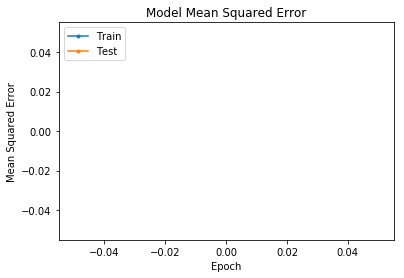

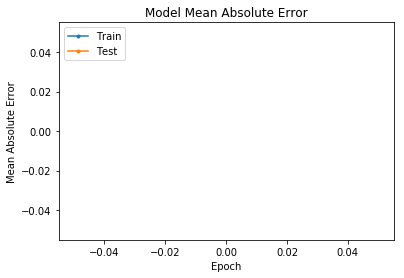

In [9]:
# plot number of added layers vs accuracy
plt.plot(trainscores.keys(), [trainscores[k][0] for k in trainscores.keys()], label='train', marker='.')
plt.plot(testscores.keys(), [testscores[k][0] for k in testscores.keys()], label='test', marker='.')
plt.title('Model Mean Squared Error')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# plot number of added layers vs accuracy
plt.plot(trainscores.keys(), [trainscores[k][1] for k in trainscores.keys()], label='train', marker='.')
plt.plot(testscores.keys(), [testscores[k][1] for k in testscores.keys()], label='test', marker='.')
plt.title('Model Mean Absolute Error')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [32]:
print(trainy)

[[0.52481  0.16267  0.35035 ]
 [0.28923  0.44765  0.28959 ]
 [0.29554  1.       0.40881 ]
 [0.088482 0.018998 0.029298]
 [1.       0.82966  0.80492 ]
 [0.29402  0.12111  0.2033  ]
 [0.29746  0.1331   0.19427 ]
 [0.047246 0.011982 0.016875]
 [0.11582  0.032275 0.069616]
 [0.95274  0.89529  1.      ]
 [0.087193 0.022884 0.022894]
 [0.       0.       0.      ]]


In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                200       
_________________________________________________________________
dense_6 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_7 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 153       
Total params: 5,453
Trainable params: 5,453
Non-trainable params: 0
_________________________________________________________________


In [34]:
    import pandas as pd
    import numpy as np

    #train=pd.read_csv('data_hamad/unseendata_hamad_Scaled.csv')
    train=pd.read_csv('data_hamad/data_hamad_Scaled.csv')
    train.head()
    X=train
    X=train.drop(['Target','Target.1', 'Target.2'] , axis=1)
    Y=train.drop(['Feature','Feature.1', 'Feature.2'] , axis=1)


    #scaler = MinMaxScaler()

   # scaler.fit(X)
    #scaler.fit(Y)
    
   # X = scaler.transform(X)
   # Y2 = scaler.transform(Y)
    print(X)

    Feature  Feature.1  Feature.2
0    1.0000    0.37288     0.5000
1    0.2027    0.74577     0.7973
2    0.7973    0.74577     0.7973
3    0.7973    0.74577     0.2027
4    0.5000    1.00000     0.5000
5    0.5000    0.37288     1.0000
6    0.7973    0.00000     0.2027
7    0.5000    0.37288     0.5000
8    0.2027    0.74577     0.2027
9    0.0000    0.37288     0.5000
10   0.5000    0.37288     0.0000
11   0.5000    0.37288     0.5000
12   0.7973    0.00000     0.7973
13   0.5000    0.37288     0.5000
14   0.2027    0.00000     0.7973


In [35]:
y_hamad_predition_3layers_normal=model.predict(X)

In [36]:
print(y_hamad_predition_3layers_normal)

[[0.99661416 0.8782463  0.9693084 ]
 [0.02131653 0.00151345 0.00291267]
 [0.11387166 0.01373872 0.04504648]
 [0.4825448  0.14056957 0.2765528 ]
 [0.04037187 0.00385109 0.00921881]
 [0.11403945 0.01543549 0.03408438]
 [0.2902792  0.99703324 0.39555416]
 [0.29200482 0.10838395 0.15533146]
 [0.08150524 0.0173766  0.02012303]
 [0.08591148 0.01871482 0.01718915]
 [0.96998674 0.81017053 0.7800179 ]
 [0.29200482 0.10838395 0.15533146]
 [0.29522926 0.4243476  0.2757542 ]
 [0.29200482 0.10838392 0.15533143]
 [0.24754591 0.0853596  0.09755184]]


In [37]:
pd.DataFrame({'real'  'real2'  'real3' : list(y_hamad_predition_3layers_normal)} ).to_csv('results_hamad_DrMaterial_3layers_normal.csv',index=True)

In [1]:
y_hamad_predition_3layers_normal.to_csv('hamad3.csv')

NameError: name 'y_hamad_predition_3layers_normal' is not defined

In [38]:

model.save('Lattice_optimisation_DLYusra_3layers_normal.h5')



In [39]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                200       
_________________________________________________________________
dense_6 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_7 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 153       
Total params: 5,453
Trainable params: 5,453
Non-trainable params: 0
_________________________________________________________________


In [40]:
for layer in model.layers:
    Weights=layer.get_weights()[0]
    Biases=layer.get_weights()[1]
print (Weights)
print (Biases)

[[ 0.07440296 -0.40605155  0.03011696]
 [ 0.9405635   0.6041634   0.63892174]
 [-0.42523757  0.10930208 -0.1303718 ]
 [ 1.036791    0.15380162  0.8192705 ]
 [-0.27722856  0.03681163 -0.42740154]
 [-0.12214395 -0.08166365  0.15410616]
 [ 0.15587792  0.212859    0.1928952 ]
 [-0.01353145 -0.02043942 -0.06665751]
 [ 0.20788164 -0.04031717 -0.19371785]
 [ 0.23228192  0.02919608 -0.19615144]
 [-0.06299859 -0.33261886 -0.07597025]
 [ 0.78881496  0.7269615   0.380996  ]
 [-0.27240324 -0.06729089 -0.16841415]
 [ 0.64735264  0.15793258  0.05033889]
 [ 0.07289436  0.01096434  0.04293819]
 [ 0.01188787  0.111214   -0.11263581]
 [-0.01840599 -0.18130529 -0.29389167]
 [-0.40834823  0.09290592 -0.25786167]
 [-0.21275997  0.22905374 -0.4903015 ]
 [ 0.19062385 -0.31900978  0.1077491 ]
 [ 0.1456121  -0.03973897 -0.22607592]
 [ 0.00331121 -0.33670515 -0.3446533 ]
 [ 0.1322355   0.4018347  -0.10110738]
 [-0.13818865 -0.2482485   0.5968174 ]
 [-0.24599838 -0.32592538 -0.10863397]
 [ 0.8470279  -0.46611765

In [41]:
#Save model weights and biases
model.save_weights("Lattice_optimisation_DLYusraWeights_3layers_normalModel.h5")